<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Feature Selection </h2>	


<h4> In this section, we would like you to select between 15 and 20 features to focus your model on. This will require significant explatoratory research. The first one is already implemented for you, and the next two are pre-specified.  </h4>

In [4]:
# Import anything you need here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
import os
import cv2
%matplotlib inline

In [5]:
data = pd.read_hdf("data.h5", "data")

In [6]:
data.head()

,Pictures,Encoding
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
3,"[[[174, 190, 187], [173, 189, 186], [172, 188,...",0
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0


In [7]:
test_img = data["Pictures"].iloc[0]

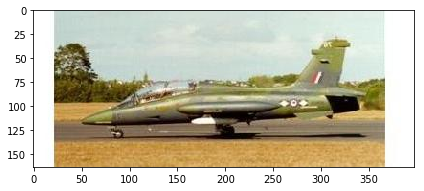

In [10]:
io.imshow(test_img)

In [11]:
def feature_size(image):
    return image.size

def feature_avg_red(image):
    return image[:, :, 0].mean()

def feature_avg_green(image):
    return image[:, :, 1].mean()

def feature_avg_blue(image):
    return image[:, :, 2].mean()

def feature_std_red(image):
    return image[:, :, 0].std()

def feature_std_green(image):
    return image[:, :, 1].std()

def feature_std_blue(image):
    return image[:, :, 2].std()

def feature_avg_gray(image):
    return np.mean(image[:, :, 0] + image[:, :, 1] + image[:, :, 2] / 3)

def feature_aspect_ratio(image):
    return image.shape[0] / image.shape[1]

def short_side_resize(image, length=256):
    height, width, _ = image.shape
    if height < width:
        ratio = length / height
    else:
        ratio = length / width
    new_height = int(height * ratio)
    new_width = int(width * ratio)
    return skimage.transform.resize(image, (new_height, new_width), mode='reflect', anti_aliasing=True)

def center_crop(image, length=224):
    height, width, _ = image.shape
    cx, cy = height // 2, width // 2
    lx, ly = cx - length//2, cy - length//2
    hx, hy = length + lx, length + ly
    return image[lx:hx, ly:hy, :]

def feature_harris(image):
    image = center_crop(short_side_resize(image))
    gray = skimage.color.rgb2gray(image)
    gray = np.array(gray * 255, dtype=np.uint8)
    harris = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    harris_corners = np.where(harris > 0)
    return len(harris_corners[0]) / harris.size

def feature_dog(image):
    gray = skimage.color.rgb2gray(image)
    g3 = np.asarray(skimage.filters.gaussian(gray, sigma=0.3))
    g5 = np.asarray(skimage.filters.gaussian(gray, sigma=0.5))
    dog = g3-g5
    return sum(sum(dog > 0.05 *dog.max() ))/dog.size

def feature_avg_y(image):
    image = skimage.color.rgb2ycbcr(image)
    return image[:, :, 0].mean()

def feature_avg_cb(image):
    image = skimage.color.rgb2ycbcr(image)
    return image[:, :, 1].mean()

def feature_avg_cr(image):
    image = skimage.color.rgb2ycbcr(image)
    return image[:, :, 2].mean()

def feature_std_y(image):
    image = skimage.color.rgb2ycbcr(image)
    return image[:, :, 0].std()

def feature_std_cb(image):
    image = skimage.color.rgb2ycbcr(image)
    return image[:, :, 1].std()

def feature_std_cr(image):
    image = skimage.color.rgb2ycbcr(image)
    return image[:, :, 2].std()

Define more features above, performing any EDA research below. We expect all external sources sited, and a couple significant different graphs indicating some form of EDA. 

<h4> Graphs </h4>

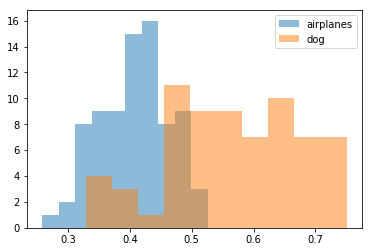

In [13]:
# EDA for Harris corner feature
path1 = '/home/sweetdum/ImageDetection/20_categories_training/airplanes/'
path2 = '/home/sweetdum/ImageDetection/20_categories_training/dog/'

def feature_counter(feature, path):
    num = []
    for fn in os.listdir(path):
        if not (fn.endswith('.jpg') or fn.endswith('.png')): 
            continue
        img = io.imread(os.path.join(path, fn))
        if len(img.shape) == 2: # gray
            img = skimage.color.gray2rgb(img)
        num.append(feature(img))
    return num

harris_corners_counter = lambda x: feature_counter(feature_harris, x)
airplanes = harris_corners_counter(path1)
dog = harris_corners_counter(path2)

plt.hist(airplanes, alpha=0.5, label='airplanes')
plt.hist(dog, alpha=0.5, label='dog')
plt.legend(loc='upper right')

0.7205882352941176
0.84251968503937


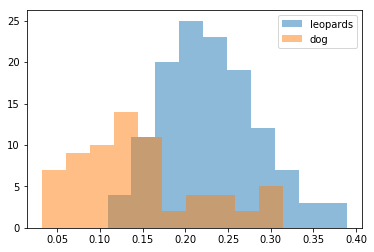

In [14]:
#DoG: Difference of Gaussian

path1 =  '20_categories_training/leopards/'
path2 = '20_categories_training/dog/'

dog_counter = lambda x: feature_counter(feature_dog, x)
porcupine = dog_counter(path1)
dog = dog_counter(path2)
plt.hist(porcupine, alpha=0.5, label='leopards')
plt.hist(dog, alpha=0.5, label='dog')
plt.legend(loc='upper right')
print(sum(np.array(dog) < 0.17) / len(dog))
print(sum(np.array(porcupine) >= 0.17) / len(porcupine))

<h4> Sources </h4>

<h4> DataFrame Creation </h4>

In [32]:
def feature_frame(df):
    df["size"] = df["Pictures"].apply(feature_size)
    df["avg_red"] = df["Pictures"].apply(feature_avg_red)
    df["avg_green"] = df["Pictures"].apply(feature_avg_green)
    df["avg_blue"] = df["Pictures"].apply(feature_avg_blue)
    df["std_red"] = df["Pictures"].apply(feature_std_red)
    df["std_green"] = df["Pictures"].apply(feature_std_green)
    df["std_blue"] = df["Pictures"].apply(feature_std_blue)
    df["avg_gray"] = df["Pictures"].apply(feature_avg_gray)
    df["aspect_ratio"] = df["Pictures"].apply(feature_aspect_ratio)
    df["harris"] = df["Pictures"].apply(feature_harris)
    df["dog"] = df["Pictures"].apply(feature_dog)
    df["avg_y"] = df["Pictures"].apply(feature_avg_y)
    df["avg_cb"] = df["Pictures"].apply(feature_avg_cb)
    df["avg_cr"] = df["Pictures"].apply(feature_avg_cr)
    df["std_y"] = df["Pictures"].apply(feature_std_y)
    df["std_cb"] = df["Pictures"].apply(feature_std_cb)
    df["std_cr"] = df["Pictures"].apply(feature_std_cr)
    del df["Pictures"]
    return df

In [33]:
def convert_rgb(image):
    if(len(image.shape) == 2):
        return skimage.color.gray2rgb(image)
    else:
        return image

In [34]:
data["Pictures"] = data["Pictures"].apply(convert_rgb)

In [35]:
feature = feature_frame(data)

In [36]:
feature.to_hdf("feature.h5", "feature", mode="w")